#### Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

#### Importing Dataset

In [2]:
df = pd.read_csv("flight.csv")
df

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,FL073,2024-09-04 21:05:15,2024-01-13 21:04:10,28,14.86,38,60.12,97.56,8.44,2.16,20903.43,11668.11,24.11,856.06,0.53,9677.51,5401.90,9235.32
199996,FL732,2024-01-25 21:17:59,2024-01-21 00:57:55,48,8.67,34,77.77,87.05,8.13,3.26,39601.03,29873.77,7.33,1037.92,1.31,12147.56,9163.73,9727.26
199997,FL519,2024-10-19 08:31:24,2024-06-04 03:40:50,83,12.80,58,93.12,80.84,9.80,3.68,36100.34,16114.79,21.82,1441.99,2.69,9809.87,4379.02,19985.55
199998,FL585,2024-01-04 04:35:20,2024-02-06 01:57:18,55,12.53,115,99.04,85.82,6.84,4.70,8157.56,15878.50,17.93,4584.92,1.26,1735.65,3378.40,-7720.94


#### Shape of the dataset

In [3]:
df.shape   # 2lakh rows and 18 columns

(200000, 18)

#### columns

In [4]:
df.columns

Index(['Flight Number', 'Scheduled Departure Time', 'Actual Departure Time',
       'Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Net Profit Margin (%)', 'Ancillary Revenue (USD)',
       'Debt-to-Equity Ratio', 'Revenue per ASK', 'Cost per ASK',
       'Profit (USD)'],
      dtype='object')

#### Checking Null values

In [6]:
df.isnull().sum()  # no null values

Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
dtype: int64

#### Duplicates

In [7]:
df.duplicated().sum() # no duplicates

0

#### Informations of data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              200000 non-null  f

#### Describe the data

In [16]:
df.describe()

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
count,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,59.35885,12.003438,74.451680,74.997178,85.001378,5.503103,3.496959,25571.448338,20429.003323,15.011169,2550.025537,1.752445,7818.578193,6245.613443,5142.445015
std,34.67602,2.311966,25.977826,14.439393,8.672413,2.601257,0.865309,14158.512116,11316.410641,5.778340,1414.291993,0.720194,4947.028923,3957.358310,18123.595784
min,0.00000,8.000000,30.000000,50.000000,70.000000,1.000000,2.000000,1000.060000,800.030000,5.000000,100.020000,0.500000,203.110000,164.830000,-38973.960000
25%,29.00000,9.990000,52.000000,62.500000,77.480000,3.250000,2.750000,13297.042500,10609.022500,10.010000,1325.570000,1.130000,3812.782500,3041.547500,-7983.690000
50%,59.00000,12.010000,74.000000,74.960000,85.000000,5.500000,3.490000,25566.300000,20410.885000,15.000000,2544.210000,1.750000,7315.460000,5834.705000,5216.975000
75%,89.00000,14.010000,97.000000,87.530000,92.530000,7.760000,4.250000,37860.402500,30245.907500,20.010000,3776.387500,2.370000,10909.272500,8715.670000,18269.647500
max,119.00000,16.000000,119.000000,100.000000,100.000000,10.000000,5.000000,49999.950000,39999.840000,25.000000,5000.000000,3.000000,24999.340000,19928.340000,49054.690000


#### correlation

In [17]:
num=[]
cat=[]
for col in df.columns:
    if df[col].dtypes=="O":
        cat.append(col)
    else:
        num.append(col)
df[num].corr()

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
Delay (Minutes),1.000000,0.000819,0.000579,0.000312,0.001825,0.003462,-0.003581,0.002174,0.001836,0.000392,-0.004391,-0.004197,0.003337,0.003696,0.000552
Aircraft Utilization (Hours/Day),0.000819,1.000000,-0.000716,-0.002950,-0.003256,0.001951,-0.000231,-0.002385,-0.000008,-0.001295,-0.000212,0.002170,-0.001580,0.000268,-0.001858
Turnaround Time (Minutes),0.000579,-0.000716,1.000000,-0.002279,-0.002353,-0.000229,-0.001041,0.001204,0.002625,0.002282,0.000887,-0.000362,0.001263,0.002775,-0.000699
Load Factor (%),0.000312,-0.002950,-0.002279,1.000000,0.001954,0.002869,-0.001853,-0.001075,0.000642,0.001407,0.000093,0.001273,0.000058,0.002399,-0.001240
Fleet Availability (%),0.001825,-0.003256,-0.002353,0.001954,1.000000,-0.001545,0.000574,-0.003051,0.001699,-0.000304,-0.002741,-0.001667,-0.003367,0.001098,-0.003445
Maintenance Downtime (Hours),0.003462,0.001951,-0.000229,0.002869,-0.001545,1.000000,-0.003429,-0.000952,-0.002287,0.002193,-0.001819,0.001120,0.000205,-0.001294,0.000684
Fuel Efficiency (ASK),-0.003581,-0.000231,-0.001041,-0.001853,0.000574,-0.003429,1.000000,-0.002239,-0.000456,0.001775,0.001156,-0.002301,-0.413438,-0.412242,-0.001465
Revenue (USD),0.002174,-0.002385,0.001204,-0.001075,-0.003051,-0.000952,-0.002239,1.000000,0.000187,-0.000526,0.000689,0.000873,0.875184,0.001253,0.781103
Operating Cost (USD),0.001836,-0.000008,0.002625,0.000642,0.001699,-0.002287,-0.000456,0.000187,1.000000,-0.003008,-0.000376,0.003083,0.000961,0.875047,-0.624256
Net Profit Margin (%),0.000392,-0.001295,0.002282,0.001407,-0.000304,0.002193,0.001775,-0.000526,-0.003008,1.000000,0.001647,0.002767,-0.000707,-0.003291,0.001468


##### We see that revenueUSD,opeartingUSD,revenuePERASK and CostPERASK is highly correlated with targert columns

#### Use Randomforest

In [18]:
forest = RandomForestRegressor()

In [34]:
df.drop(columns=["Flight Number"],inplace=True)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Profit (USD)"]),df["Profit (USD)"],test_size=0.3,random_state=42)

In [36]:
x_train

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK
21269,22,14.54,51,62.76,98.09,2.90,3.82,33447.60,35262.91,17.14,3437.43,0.71,8755.92,9231.13
187660,44,15.07,77,61.28,77.04,9.92,3.68,21389.37,27290.92,7.86,4482.43,2.71,5812.33,7416.01
774,49,9.67,101,96.39,72.75,7.26,2.36,19830.07,30881.69,15.72,2583.81,1.08,8402.57,13085.46
184577,78,10.58,76,95.97,78.34,2.10,3.60,27714.73,17784.82,19.41,1816.89,2.87,7698.54,4940.23
37127,12,11.14,96,73.84,75.35,1.37,4.62,22149.52,9027.56,20.13,2224.72,1.38,4794.27,1954.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,37,11.35,47,80.73,90.38,6.85,3.29,34133.94,31989.59,8.58,4948.21,1.60,10375.06,9723.28
103694,112,8.17,86,67.39,80.75,3.22,4.14,45160.01,37065.03,22.25,4294.33,0.70,10908.21,8952.91
131932,78,14.52,109,86.41,91.47,2.84,2.21,28324.84,14708.34,14.38,4056.41,2.40,12816.67,6655.36
146867,16,12.07,66,74.23,75.62,9.35,3.90,40434.90,34318.20,20.28,3304.63,2.40,10367.92,8799.54


In [37]:
forest=RandomForestRegressor()

In [38]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
feature_importances = forest.feature_importances_
columns_ = x_train.columns
dataframe_ = pd.DataFrame({"Column_Name" :columns_,"Feature_Importance":feature_importances})
print(dataframe_)

                         Column_Name  Feature_Importance
0                    Delay (Minutes)            0.000003
1   Aircraft Utilization (Hours/Day)            0.000003
2          Turnaround Time (Minutes)            0.000003
3                    Load Factor (%)            0.000003
4             Fleet Availability (%)            0.000003
5       Maintenance Downtime (Hours)            0.000003
6              Fuel Efficiency (ASK)            0.000002
7                      Revenue (USD)            0.610247
8               Operating Cost (USD)            0.389718
9              Net Profit Margin (%)            0.000003
10           Ancillary Revenue (USD)            0.000003
11              Debt-to-Equity Ratio            0.000003
12                   Revenue per ASK            0.000002
13                      Cost per ASK            0.000002


#### Plot horizontal bar chart of feature importance

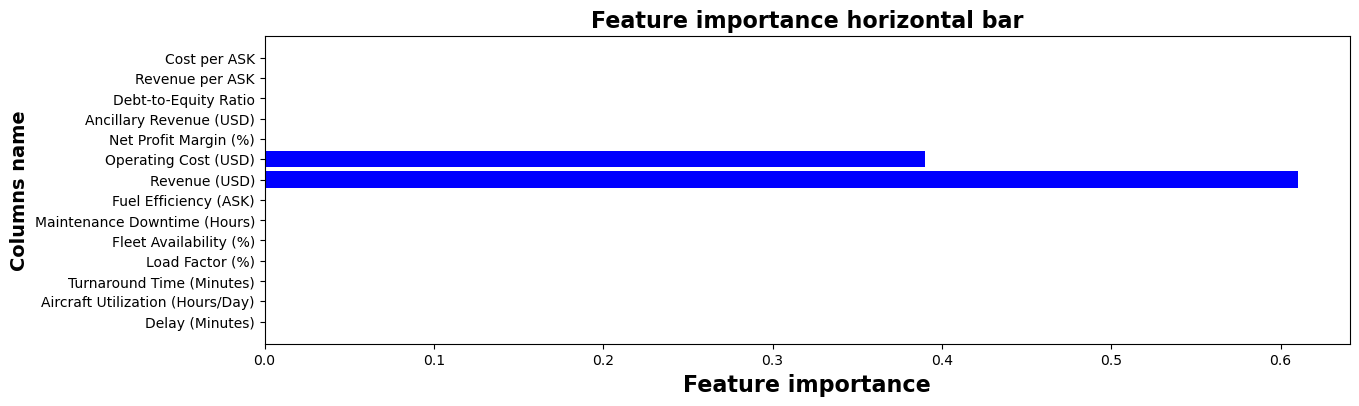

In [45]:
plt.figure(figsize=(14,4))
plt.barh(dataframe_["Column_Name"],dataframe_["Feature_Importance"],color="blue")
plt.title("Feature importance horizontal bar",fontweight="bold",fontsize=16)
plt.xlabel("Feature importance",fontsize=16,fontweight="bold")
plt.ylabel("Columns name",fontsize=14,fontweight="bold")
plt.show()

### So Important feature is Revenue (USD) and Operating Cost (USD)

In [46]:
y_pred = forest.predict(x_test)

In [47]:
print(r2_score(y_test,y_pred)*100)

99.99906845688251


In [48]:
print(mean_squared_error(y_test,y_pred)*100)

303970.53642793396


In [49]:
print(mean_absolute_error(y_test,y_pred)*100)

4239.544347833335


In [50]:
y_pred2 = forest.predict(x_train)

In [51]:
print(r2_score(y_pred2,y_train)*100)

99.99983726237902


In [22]:
scores = cross_val_score(forest, x_train, y_train, cv=5, scoring='r2')
print("r2_score:", scores)


r2_score: [0.99999247 0.99999256 0.99999275 0.99999297 0.99999275]


#### Cross val score is also good that means model perform well 

In [ ]:
# Thank